In [1]:
import chess.pgn
import pandas as pd

from utils import stem_hist, get_games

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

In [2]:
games = get_games('./data/lichess_alexdinu_2020-08-02.pgn')
print(len(games), 'games')

hs = pd.DataFrame([dict(g.headers) for g in games])

for t in ['WhiteElo', 'BlackElo']:
    hs = hs[hs[t] != '?']
    hs[t] = hs[t].astype(int)
    
hs.shape

342 games


(267, 19)

## Elo

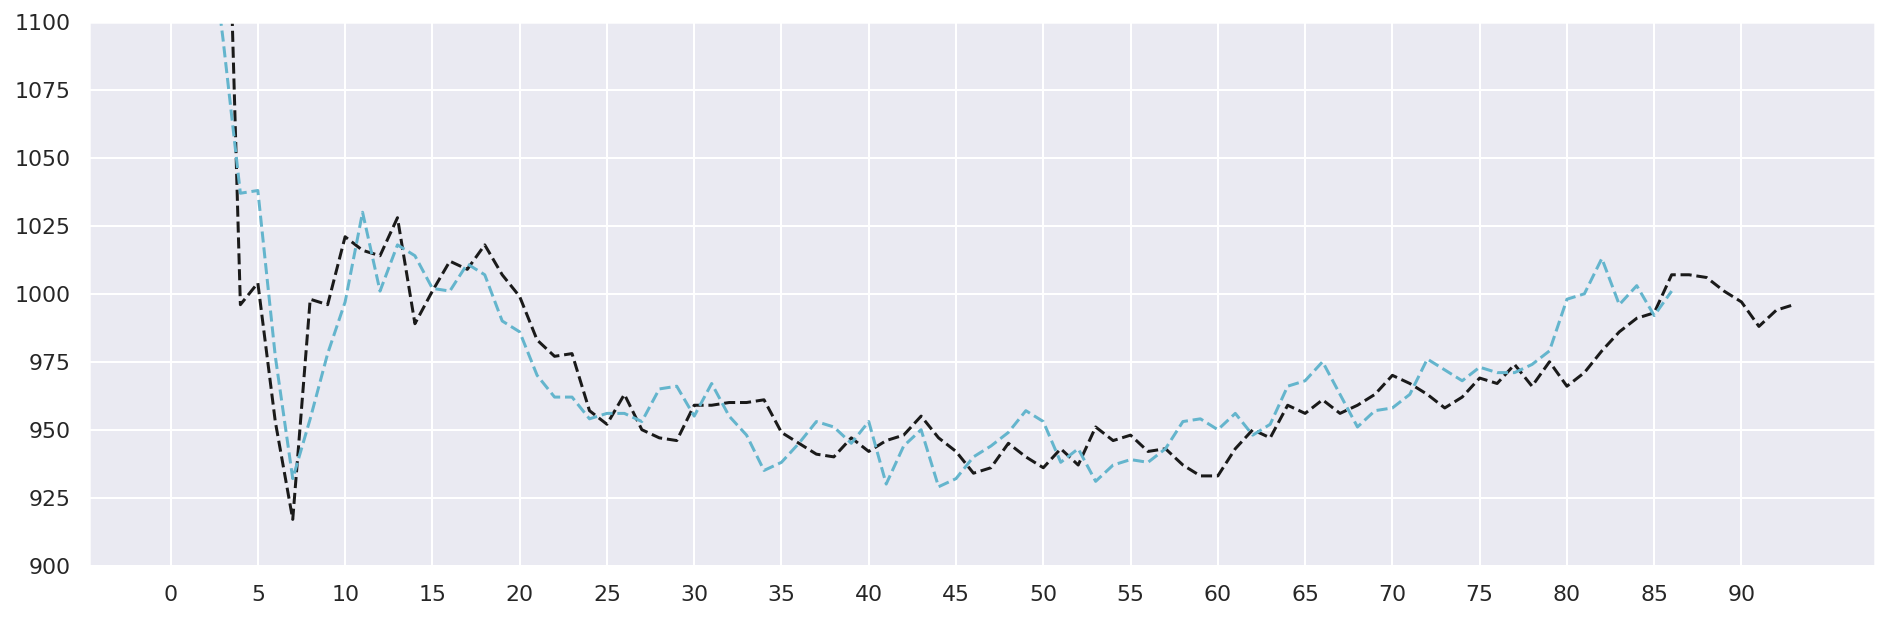

In [19]:
b = hs[hs.Event == 'Rated Blitz game']

w_elo = b[b.White == 'alexdinu'][['Date', 'WhiteElo']]
b_elo = b[b.Black == 'alexdinu'][['Date', 'BlackElo']]

plt.figure(figsize=(16,5))
plt.plot(b_elo.BlackElo[::-1].to_numpy(), linestyle='--', color='k')
plt.plot(w_elo.WhiteElo[::-1].to_numpy(), linestyle='--', color='c')
plt.xticks(np.arange(0, max(len(w_elo), len(b_elo)), 5))
plt.ylim([900, 1100])
pass

## Wins

In [20]:
w_w = round(hs[(hs.White == 'alexdinu') & (hs.Result == '1-0')].shape[0] / w_elo.shape[0], 12)
b_w = round(hs[(hs.Black == 'alexdinu') & (hs.Result == '0-1')].shape[0] / b_elo.shape[0], 12)

print(f'white: {w_w:.5f}\nblack: {b_w:.5f}')

white: 0.65517
black: 0.55319


## Openings

In [21]:
w_g = [g for g in games if g.headers['White'] == 'alexdinu']
b_g = [g for g in games if g.headers['Black'] == 'alexdinu']

w_f = [list(g.mainline_moves())[0].uci() for g in w_g]
b_f = [list(g.mainline_moves())[0].uci() for g in b_g]

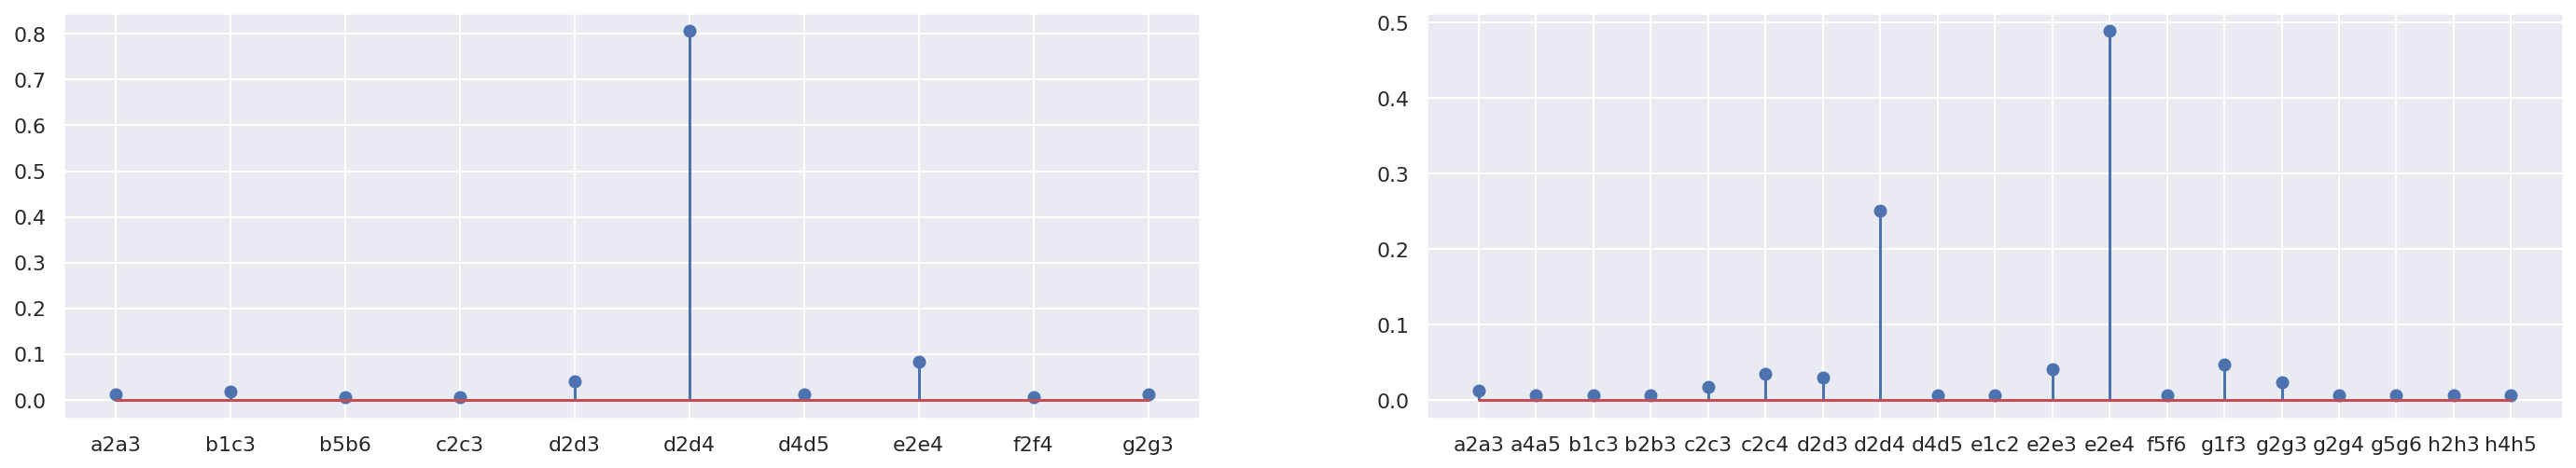

In [23]:
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
stem_hist(w_f)
plt.subplot(1,2,2)
stem_hist(b_f)